<a href="https://colab.research.google.com/github/graccelle/hello-world/blob/master/GraceBabalola_SSIE643HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Libraries Imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
import itertools
from sklearn.metrics import r2_score
import scipy.stats as st
%matplotlib inline

**Explanation**: The codes in line [4]above were written to import all the possible packages that would be needed to completet the task assigned.

**Q1.** Do the computer simulation to generate 𝑦=5+4𝑥1+3𝑥2−2𝑥3+𝜀,with 𝜀∼𝒩(0, 0.5^2), 𝑥1∼unif(0,4), 𝑥2∼unif(1,4), 𝑥3∼𝒩(3,0.4^2). 𝑁=20.

In [4]:
# Data Preparation 
N = 20

random.seed(5)
err = np.random.normal(0, 0.5, (N,1))  # As given in the question, error term has a normal distribution with mean of 0 and standard deviation of 0.5.

random.seed(5)
X1 = np.random.uniform(0, 4, (N, 1))    # As given in the question, X1 and X2 has a uniform distribution between 0 and 4, and 1 and 4 respectively.

random.seed(5)
X2 = np.random.uniform(1, 4, (N, 1))

random.seed(5)
X3 = np.random.normal(3, 0.4, (N, 1))    # As given in the question, error term has a normal distribution with mean of 3 and standard deviation of 0.4.

X0 = np.concatenate((X1, X2, X3), axis = 1)

X = np.concatenate((np.ones((N,1)), X0), axis = 1) # To compute Matrix of features.

beta = np.array([5, 4, 3, -2])           # To compute the bias terms arrays (4 x 1).
beta = np.asmatrix(beta)                 # For converting to a 4 x 1 vector.

y = X.dot(beta.T) + err
y[:3]  # Alternative to print output command used to view the values for y

matrix([[ 4.84443848],
        [14.4222424 ],
        [ 3.5708139 ]])

(**1**) **Calculation** **of** **Beta** **hat** **Using the formula in Q1**

In [5]:
# Coefficient Estimate
iX = np.linalg.inv(X.T.dot(X))
coef = iX.dot(X.T).dot(y)
print(f'{coef}')    # To view the values of beta hat estimate

[[ 4.36479719]
 [ 3.90364322]
 [ 3.1603537 ]
 [-1.8522934 ]]


**Explanation**: As shown by the output of the command "print (f'{coef}')" the estimate of the coefficient of Beta hat is very close to the coefficients in the formula but not exactly.

**Calculation of Standard Deviation hat (𝜎̂^2)**

In [6]:
# Prediction at the training input
p = 3
yhat = X.dot(coef)
print(f'{yhat[:3]}')       # To view the values of yhat estimate

[[ 5.25095877]
 [13.33433355]
 [ 3.86528301]]


**Explanation:** To calculate 𝜎̂^2, we first need to calculate yhat estimate, which was gotten with the code in line [25]. Afterwards we calculate 𝜎̂^2 estimate with p=3, since we have three independent variables (i.e. X1, X2, & X3) which forms the three column for the matrix. The code in line [33] is the computation of 𝜎̂^2 when N=20, p=3; the estimated value of 𝜎̂^2 is 0.3161.

In [7]:
# 𝜎̂^2 Estimate
val = (1/ (N-p-1)) *np.sum(np.dot((y-yhat).T, (y-yhat)))
val         # To view the value of standard deviation hat estimate

0.31608423499791294

**Calculation of the Hat Matrix**

In [8]:
# Hat Matrix Estimate

H = X.dot(iX).dot(X.T)
H[:2]

array([[ 0.17404012,  0.01983618,  0.15062758,  0.06774296,  0.12082457,
         0.15448366,  0.04340762,  0.17635409,  0.0685393 ,  0.05040441,
        -0.01982913,  0.08516308, -0.07341465,  0.06798267, -0.03838225,
        -0.1006742 , -0.03731551,  0.00508984,  0.08183499,  0.00328465],
       [ 0.01983618,  0.1239508 ,  0.10067442,  0.09671115, -0.0022337 ,
        -0.06946857,  0.11294699,  0.0136403 , -0.03624953, -0.03246639,
        -0.02824831,  0.09938942,  0.09678262,  0.01442345,  0.0021228 ,
         0.09018761,  0.09975178,  0.08049323,  0.11307797,  0.10467778]])

**Rows Summation of the Hat Matrix Estimate**

In [9]:
# Row sum of the Hat Matrix Estimate
H_row_sum = np.sum(H, axis=1)  # To sum across the Matrix rows 
H_row_sum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

**Explanation:** The summation of the Hat Matrix rows indicates the extra bias column for the bias term (b0) that was added to the X matrix. The Hat Matrix is the matrix of projection. It expresses the values of the observations in the independent variable (y), which is in terms of the linear combinations of the column vectors of the model matrix, X. The model matrix contains the observations for each of the multiple variables upon which is being regressed.

**(2) Calculation of Confidence Interval for Beta Hat**

In [10]:
# Degree of Freedom
df = N - p - 1

# Residual Sum of Squares
RSS = sum(np.asarray(yhat - y)**2)
sigma2 = RSS / df
(RSS, sigma2)

(array([5.05734776]), array([0.31608423]))

In [11]:
# Calculation of Confidence Interval For Beta1
j = 0

Cjj = iX[j,j] 

stdE = np.sqrt(Cjj*sigma2)  # Standard error calculation

tval = st.t.ppf(1-0.025, df)  # T value calculation

#Calculate confidence interval
CI_lower = coef[j] -(tval*stdE)  # Lower Bound C.I. calculation
CI_upper = coef[j] + (tval*stdE)   # Upper Bound C.I. calculation
print (f'{tval},{CI_lower},{CI_upper}')

2.1199052992210112,[[2.48657371]],[[6.24302067]]


**Explanation:** The t value for beta 1 is **2.1199** and the confidence intreval is from **2.4866 to 6.2430**.

In [12]:
# Calculation of Confidence Interval For Beta2
j = 1

Cjj = iX[j,j] 

stdE = np.sqrt(Cjj*sigma2)  # Standard error calculation

tval = st.t.ppf(1-0.025, df)  # T value calculation

#Calculate confidence interval
CI_lower = coef[j] -(tval*stdE)  # Lower Bound C.I. calculation
CI_upper = coef[j] + (tval*stdE)   # Upper Bound C.I. calculation
print (f'{tval},{CI_lower},{CI_upper}')

2.1199052992210112,[[3.67035904]],[[4.1369274]]


**Explanation:** The t value for beta 2 is **2.1199** and the confidence intreval is from **3.6704 to 4.1369**.

In [13]:
# Calculation of Confidence Interval For Beta3
j = 2

Cjj = iX[j,j] 

stdE = np.sqrt(Cjj*sigma2)  # Standard error calculation

tval = st.t.ppf(1-0.025, df) # T value calculation

#Calculate confidence interval
CI_lower = coef[j] -(tval*stdE)  # Lower Bound C.I. calculation
CI_upper = coef[j] + (tval*stdE)   # Upper Bound C.I. calculation
print (f'{tval},{CI_lower},{CI_upper}')

2.1199052992210112,[[2.87930942]],[[3.44139798]]


**Explanation:** The t value for beta 3 is **2.1199** and the confidence intreval is from **2.8793 to 3.4414**.

In [14]:
# Calculation of Confidence Interval For Beta4
j = 3

Cjj = iX[j,j] 

stdE = np.sqrt(Cjj*sigma2)  # Standard error calculation

tval = st.t.ppf(1-0.025, df)  # T value calculation

#Calculate confidence interval
CI_lower = coef[j] -(tval*stdE)  # Lower Bound C.I. calculation
CI_upper = coef[j] + (tval*stdE)   # Upper Bound C.I. calculation
print (f'{tval},{CI_lower},{CI_upper}')

2.1199052992210112,[[-2.47342954]],[[-1.23115725]]


**Explanation:** The t value for beta 4 is **2.1199** and the confidence intreval is from **-2.4734 to -1.2312**.
Hence, since all the beta confidence interval values does not contain zeros, it means there is a significant different between the groups features.

**(3) Calculation of R^2, F test and T test**

In [15]:
# Calculation of R^2
yb = np.mean(y)
SST = sum( np.asarray(y - yb)**2)

SSR = sum(np.asarray(yhat - yb)**2)

SSE = sum(np.asarray(y - yhat)**2)

R2 = SSR / SST 
(SST, SSR, SSE, R2)

(array([701.00514651]),
 array([695.94779875]),
 array([5.05734776]),
 array([0.99278558]))

**Explanation**: The SST value is 701.0052, SSR value is 695.9478, SSE value is 5.0574 and **R^2 is 0.9928.** This means that 99.28% of the variation in the data is explained by the model.

**Calculation of F test**

In [16]:
dfn = 3      # Numerator Degree of Freedom
dfd = N-3-1  # Denominator Degree of Freedom

num = SSR / dfn
dem = SSE / dfd
Fval = num/dem     # F test value
cval = st.f.ppf(1-0.05, dfn, dfd)  # Critical value 
pval = 1 - st.f.cdf(Fval, dfn, dfd) # P value
print (f" The F test value is {Fval} with a p value: {pval} at critical value {cval}")


 The F test value is [733.92651039] with a p value: [1.11022302e-16] at critical value 3.238871517453585


**Calculation of T test**

In [17]:
for j in range(1,4):      # For all three features x1,x2 and x3
    print(f"T test parameters for X{j} are :")
    stdE = np.sqrt(iX[j,j]*sigma2)
    tval = (coef[j] - 0) / stdE
    print('T value is', tval)
    cval = st.t.ppf(1-0.05, df)    # At 0.05 significant level
    print('Critical value is', cval)
    pval = 1 - st.t.cdf(tval, df)
    print('P value is', pval) 
    
    if tval > cval:
        print (f"Since t-value is greater than critical value, we reject the \n null hypothesis. Meaning there is a significant contribution from x{j} ")
    else:
        print(f"No Significant contribution from x{j} to the model since t-value is less than critical value")
        
    print('\n')

T test parameters for X1 are :
T value is [[35.47327536]]
Critical value is 1.74588367627624
P value is [[0.]]
Since t-value is greater than critical value, we reject the 
 null hypothesis. Meaning there is a significant contribution from x1 


T test parameters for X2 are :
T value is [[23.83841624]]
Critical value is 1.74588367627624
P value is [[3.14193116e-14]]
Since t-value is greater than critical value, we reject the 
 null hypothesis. Meaning there is a significant contribution from x2 


T test parameters for X3 are :
T value is [[-6.32178086]]
Critical value is 1.74588367627624
P value is [[0.99999492]]
No Significant contribution from x3 to the model since t-value is less than critical value




**(4) Randomly assign testing points.**

In [18]:
# Randomly assigning testing points 
x1 = 3.5 
x2 = 2.2
x3= 4.0

# True value of Y based on the formula given
random.seed(0) 
err = np.random.normal(0,0.5,(1,1))
y_true =  5 + 4*x1 + 3*x2 - 2*x3 + err
print('The true y value is', y_true)

# Predicted Y
X = np.array([1,x1,x2,x3])
X = np.asmatrix(X)
y_pred = X.dot(coef)
print('The predicted value of y is', y_pred)

# Hat Matrix
iX = np.linalg.pinv((X.T).dot(X))
Hat_matrix = X.dot(iX).dot(X.T)
print('The Hat Matrix is', Hat_matrix)

The true y value is [[18.17035791]]
The predicted value of y is [[17.57115302]]
The Hat Matrix is [[1.]]


**Explanation:** There is not much difference between the true y value and the predicted value of y, as they are quite similar. The hat matrix is 1 which indicates the matrix of projection.
Linear regression is an analytical technique that is used for prediction of a variable (dependent) value based on the value of another variable (independent). The linear regression is used to estimates the coefficients of the linear equation, that involves one or more predictor variables that best predict the value of the response variable.

**(5) Software Output Comparison.**

In [19]:
reg = LinearRegression().fit(X0, y)
coef = np.concatenate((np.asmatrix(reg.intercept_).T, reg.coef_), axis = 1)
print("the fitted coef is")
print(coef) 

the fitted coef is
[[ 4.36479719  3.90364322  3.1603537  -1.8522934 ]]


In [20]:
yp = reg.predict(X0)
# total sum squares
# SST
dif = np.square(y - np.mean(y) )
SST = sum(dif)
# SSE
dif = np.square( y - yp )
SSE = sum(dif)
# SSR
dif = np.square( yp - np.mean(y) )
SSR = sum(dif)
(SST, SSR, SSE)

(matrix([[701.00514651]]), array([695.94779875]), matrix([[5.05734776]]))

**Explanation:** Compared to the the previously generated outputs (i.e. intercept, Coefficient of beta (slope), SST, SSE, and SSR) are all the same as the ones generated by the software package. This is a form of validating the model that was built. Hence, we can say our model is valid.

**Q2.** Simulation of 𝑦=5+4𝑥1+3𝑥2−2𝑥3+𝑥4+𝜀, with 𝑥4=𝑥1+2𝑥2 and 𝑁=50. Everything else is the same as Q1. 
Since, x4 = x1+2x2, substitute for x4:

y = 5 + 4𝑥1 + 3𝑥2 − 2𝑥3 + (x1+2x2)+ 𝜀

y = 5 + 5x1 +5x2 - 2x3 + 𝜀

In [21]:
# Data Preparation 
N = 50

random.seed(5)
err = np.random.normal(0, 0.5, (N,1))  

random.seed(5)
X1 = np.random.uniform(0, 4, (N, 1))    

random.seed(5)
X2 = np.random.uniform(1, 4, (N, 1))

random.seed(5)
X3 = np.random.normal(3, 0.4, (N, 1))    

X0 = np.concatenate((X1, X2, X3), axis = 1)

X = np.concatenate((np.ones((N,1)), X0), axis = 1) 

beta = np.array([5, 5, 5, -2])           
beta = np.asmatrix(beta)                 

y = X.dot(beta.T) + err
y[:3]  

matrix([[18.48857337],
        [28.92493427],
        [ 6.85972758]])

**(1) Calculation of Beta hat Using the formula in Q2**

In [22]:
# Coefficient Estimate
iX = np.linalg.inv(X.T.dot(X))
coef = iX.dot(X.T).dot(y)
print(f'{coef}')    # To view the values of beta hat estimate

[[ 4.97831827]
 [ 4.98021766]
 [ 5.11000053]
 [-2.09289792]]


**Explanation:** As shown by the output of the command "print (f'{coef}')" the estimate of the coefficient of Beta hat is very close to the coefficients in the formula but not exactly. Once the value of x4 has been substituted in the original equation, our x features went back to the original 3 features (i.e. x1, x2, x3) with different value for slope as defined in the simulation above (Q2). Thus, the beta hat was calculated using the formula in Q2 after substitution.

**(2) Implementation of Subset Selection.**

In [23]:
X = pd.DataFrame(data=X0,columns= ['x1','x2','x3'])  #Covertion to dataframe to easy subsetting
X.head()  #check first 5 rows

,x1,x2,x3
0,0.605994,3.214577,3.167961
1,2.345212,3.788628,3.291183
2,0.256905,1.379459,3.000287
3,3.504191,2.378750,2.906148
4,0.205759,1.324561,3.021097


**Explanation:** To simplify the matrix X, the software package used converted the X array to a dataframe with the column names of the three features (i.e. X1, X2, X3) as shown in the result above for the first five rows. Afterwards, we defined a function to fit the Linear Regression and return RSS and R^2 values as shown below:

In [24]:
def fit_linear_regression(X,Y):

    # To fit linear regression model and return RSS and R^2 values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [25]:
# Implementing the best subset selection
from tqdm import tnrange, tqdm_notebook # Import tqdm for the progress bar

# Variables Initialization
k = 3                       # The 3 features in X
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

for k in tnrange(1,len(X.columns)+ 1, desc = 'Loop...'):  # Looping over k = 1 to k = 3 features in X
  
    for combo in itertools.combinations(X.columns,k):    # Looping over all possible combinations: from 3 choose k
        tmp_result = fit_linear_regression(X[list(combo)],y)   # Store temporary result 
        RSS_list.append(tmp_result[0])                         # Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

# Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':


In [26]:
df

,numb_features,RSS,R_squared,features
0,1,1162.969769,0.591034,"(x1,)"
1,1,1952.756299,0.313301,"(x2,)"
2,1,2791.905562,0.018208,"(x3,)"
3,2,77.655489,0.972692,"(x1, x2)"
4,2,1130.335642,0.602510,"(x1, x3)"
5,2,1866.359614,0.343683,"(x2, x3)"
6,3,14.573355,0.994875,"(x1, x2, x3)"


In [27]:
best_model = df.loc[df['RSS'].values.argmin()] # Choosing the best model (Model with the lowest RSS value and invariably the highest R^2)
best_model

numb_features               3
RSS                   14.5734
R_squared            0.994875
features         (x1, x2, x3)
Name: 6, dtype: object

**Explanation:** This means that the best model is the one that includes all three features (i.e. X1, X2, X3) as the model account for 99.49% of the variation in the data based on the R^2 output and RSS value of 14.5734 which has the lowest residual sum of squares.

In [28]:
# Choosing the best subset for each number of features
df[df['RSS'] ==df.groupby('numb_features')['RSS'].transform('min')] 

,numb_features,RSS,R_squared,features
0,1,1162.969769,0.591034,"(x1,)"
3,2,77.655489,0.972692,"(x1, x2)"
6,3,14.573355,0.994875,"(x1, x2, x3)"


**Explanation:** To select the best subsets for each number of features, we will use the RSS as the criteria as was done in choosing the best model above. As shown in the result if the code in line [128], the obvious choices are feature X1 if we are to pick just one feature, and features X1, X2 if we were to pick a subset of two, and finally features X1, X2, X3 if we are looking at picking a subset of three variables. These features were selected based on their RSS value, and concesquentially their respective R^2.

**Implementation of Forward/Backward Selection.**

In [29]:
# Variables Initialization
k = 3
Remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] # Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(Remaining_features,1):

            RSS = fit_linear_regression(X[list(combo) + features],y)   # For storing temporary result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    # Updating variables for the next loop
    features.append(best_feature)
    Remaining_features.remove(best_feature)
    
    # To save values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,4)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['x1'], 1163.0), (2, ['x1', 'x2'], 78.0), (3, ['x1', 'x2', 'x3'], 15.0)]

**Explanation:** The result of the stepwise selection shows that the model improved from when only feature X1 was included to the addition of X2, and invariably including X3 in the model. Thus, based on the RSS value, the best model to select or adopt is the one that includes all of the three features as they all best predicts 'y'. This conclusion is in line with the subset selection explained above.

**Implementation of Ridge Regression.**


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=1)  # To split data into training and testing set
print(f'X train dataset are {X_train.shape} and Y train dataset are {y_train.shape}') # To check the size of the training dataset

X train dataset are (30, 3) and Y train dataset are (30, 1)


**Explanation:** First, we seperated the data into training and testing. 40% of the data was assigned to the testing set, while the remaining 60% was used for the training data as shown in the result of the code in line [131]. Next we performed a ridge model fitting using the random value of Hyperparameter, Alpha as shown below:

In [31]:
# Ridge model fitting, using Hyperparameter random values, Alpha
ridge = Ridge(alpha = 1.0, normalize = True)   # For Alpha = 1.0 , to initialize the ridge regressor
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge.predict(X_test) 
print(f'Mean squared error is {mean_squared_error(y_test, pred)}')  # To view the mean square error 
print(f'The R^2 value at alpha 1.0 is {ridge.score(X_train, y_train)}')
y_test[:5]

Mean squared error is 16.799757522722096
The R^2 value at alpha 1.0 is 0.7485018541759035


matrix([[17.44140717],
        [17.38582376],
        [29.07922637],
        [13.15849997],
        [ 6.85972758]])

In [32]:
ridge1 = Ridge(alpha = 2.0, normalize = True)     # For Alpha = 2.0 , to initialize the ridge regressor
ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred1 = ridge1.predict(X_test)
print(f'Mean squared error is {mean_squared_error(y_test, pred1)}')  # To view the mean square error 
print(f'The R^2 value at alpha 2.0 is {ridge1.score(X_train, y_train)}')

Mean squared error is 29.360153303899967
The R^2 value at alpha 2.0 is 0.5554435288482285


In [33]:
# Generate range of Alpha values to perform cross-validation ridge
alphas = 10**np.linspace(10,-2,100)*0.5     # To generate range of hyperparameters, alpha
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [34]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)  # Using cross validation, determine the best hyperparameter
ridgecv.fit(X_train, y_train)
print(f'Best alpha value is {ridgecv.alpha_}')

Best alpha value is 0.005


In [35]:
# Fit the Ridge regression using the best value of Alpha
ridge2 = Ridge(alpha = 0.005, normalize = True)
ridge2.fit(X_train, y_train)    # Fit a ridge regression on the training data
pred2= ridge2.predict(X_test)
print(f'Mean squared error is {mean_squared_error(y_test, pred2)}')  # To view the mean square error on predicted data
print(f'The R^2 value at alpha 0.005 is {ridge2.score(X_train, y_train)}')

Mean squared error is 0.39298729335796523
The R^2 value at alpha 0.005 is 0.9956165642817498


**Explanation:** Using Hyperparameter random values, we generated a range of Alpha values to perform cross-validation ridge. The cross validation was done on the predicted data to determine the **best alpha value** which is **0.005.** Also, to check the fitness of the ridge regression using the best alpha value, the **mean squared error** is **0.3930** and the **r squared value** is **0.9956.** Which implies that at alpha 0.005, the model fits 99.56% of the data. Invariably, 99.56% of the variation in the data is explained by the model.

**Implementation of Lasso Regression.**

Text(0, 0.5, 'weights')

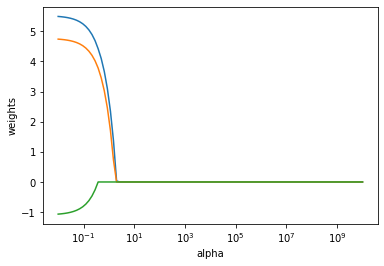

In [50]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:                      # To search for the best value of alpha without cross validating
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [51]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)     # To initialize a Lasso Regressor with Cross Validation (CV)
lassocv.fit(X_train, y_train)
lassocv.predict(X_test)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print (f'Mean square error: {mean_squared_error(y_test, lasso.predict(X_test))}')    # To check the mean square error for the base value of alpha
print (f'R^2 Value: {r2_score(y_test, lasso.predict(X_test))}')

Mean square error: 0.3898911093105134
R^2 Value: 0.9924126408137579


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)     # To initialize a Lasso Regressor with Cross Validation (CV)
lassocv.fit(X_train, y_train)
lassocv.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([17.98533071, 16.91471116, 29.28332017, 13.48596173,  7.08941687,
       28.54873443, 16.13008105, 18.15100528, 10.94663349,  4.73574891,
       26.19662089, 26.20267972, 23.75710126, 24.79507501, 28.31524772,
       17.3122372 , 25.20312735, 18.97305284, 19.86023338, 10.44551513])

**Explanation:** Both R^2 and mean square error of Lasso have similar outputs when we searched for best value of alpha either cross validated or not. Thus, performing cross validation provides the model validity since we since we do not have to search for the best value of alpha; it is given by CV.